## Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

#Load dataset

In [2]:
#from google.colab import files
#uploaded = files.upload()
#import io
dataset = pd.read_csv('data/wines.csv') #(io.BytesIO(uploaded['wines.csv']), header=0)
dataset.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
dataset['Class'].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64

# Exploring Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  Diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
dataset.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
dataset.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
Diluted wines           float64
Proline                   int64
dtype: object

In [7]:
dataset.describe(include=[object, bool, int, float]).T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00
Hue,178.0,0.957449,0.228572,0.48,0.7825,0.965,1.1200,1.71


In [8]:
dataset.corr()['Class']

Class                   1.000000
Alcohol                -0.328222
Malic acid              0.437776
Ash                    -0.049643
Alcalinity of ash       0.517859
Magnesium              -0.209179
Total phenols          -0.719163
Flavanoids             -0.847498
Nonflavanoid phenols    0.489109
Proanthocyanins        -0.499130
Color intensity         0.265668
Hue                    -0.617369
Diluted wines          -0.788230
Proline                -0.633717
Name: Class, dtype: float64

<AxesSubplot:>

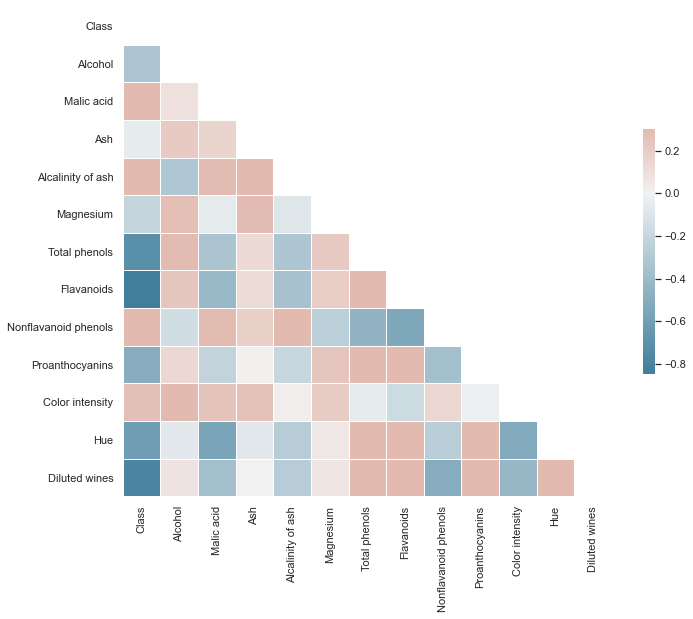

In [9]:
correlation_matrix=dataset.iloc[:,0:13].corr(method="pearson") #Use only predictor variables
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Selection

## Sort correlations

In [10]:
correlation_matrix['Class'].sort_values(ascending=False)
my_filter=correlation_matrix['Class']>=0
print(correlation_matrix.loc[my_filter, 'Class'].sort_values(ascending=False))
my_filter=correlation_matrix['Class']<0
print(correlation_matrix.loc[my_filter, 'Class'].sort_values(ascending=True))

Class                   1.000000
Alcalinity of ash       0.517859
Nonflavanoid phenols    0.489109
Malic acid              0.437776
Color intensity         0.265668
Name: Class, dtype: float64
Flavanoids        -0.847498
Diluted wines     -0.788230
Total phenols     -0.719163
Hue               -0.617369
Proanthocyanins   -0.499130
Alcohol           -0.328222
Magnesium         -0.209179
Ash               -0.049643
Name: Class, dtype: float64


## Choose the most correlated variables as predictors

In [11]:
columns=['Alcalinity of ash', 
'Nonflavanoid phenols',
'Flavanoids',
'Malic acid',
'Flavanoids',       
'Diluted wines',    
'Total phenols',    
'Hue',               
'Proanthocyanins',   
'Alcohol']           
X = dataset.loc[:,columns] #predictors
y = dataset.loc[:,'Class'] #outcome


## Define Training and Test Datasets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training %d instances"%(x_train.shape[0]))
print("Test %d instances"%(x_test.shape[0]))

Training 133 instances
Test 45 instances


#Foundations of Ensambling Methods


## Marginal Training



In [13]:
#Create models
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= GaussianNB()
#Training
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

GaussianNB()

## 0. Marginal predictions  

In [14]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

for i in range(0,len(x_test)):
    print('registro: ',i,'  ', [pred1[i], pred2[i], pred3[i]])
print("Marginals Accuracies")

registro:  0    [3, 3, 3]
registro:  1    [2, 2, 2]
registro:  2    [1, 1, 1]
registro:  3    [2, 2, 2]
registro:  4    [1, 1, 1]
registro:  5    [3, 3, 3]
registro:  6    [2, 2, 2]
registro:  7    [1, 1, 1]
registro:  8    [3, 3, 3]
registro:  9    [2, 2, 2]
registro:  10    [1, 1, 1]
registro:  11    [1, 2, 1]
registro:  12    [2, 2, 2]
registro:  13    [1, 1, 1]
registro:  14    [2, 2, 2]
registro:  15    [2, 2, 2]
registro:  16    [3, 3, 3]
registro:  17    [1, 1, 1]
registro:  18    [2, 2, 2]
registro:  19    [1, 1, 1]
registro:  20    [1, 1, 1]
registro:  21    [2, 2, 2]
registro:  22    [3, 2, 3]
registro:  23    [1, 2, 2]
registro:  24    [1, 1, 1]
registro:  25    [3, 3, 3]
registro:  26    [1, 1, 1]
registro:  27    [1, 1, 1]
registro:  28    [1, 1, 1]
registro:  29    [3, 3, 3]
registro:  30    [2, 1, 2]
registro:  31    [3, 3, 3]
registro:  32    [2, 3, 3]
registro:  33    [1, 1, 1]
registro:  34    [2, 2, 2]
registro:  35    [2, 2, 2]
registro:  36    [2, 2, 2]
registro:  

### Visualization of predictions

DT0.9333333333333333
KN0.9111111111111111
NB0.9777777777777777


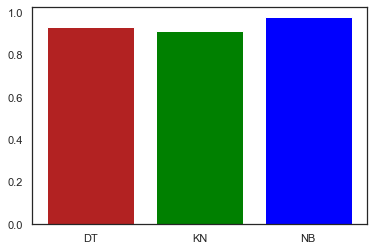

In [15]:
#Function to visualize results
def plot_prediction(prediction, labels):
    levels = np.arange(len(labels))
    # Create bars
    plt.bar(levels, prediction, color=['firebrick', 'green', 'blue'] )
    # Create names on the x-axis
    plt.xticks(levels, labels)
    # Show graphic
    plt.show()

        
#Visualization
names_models=['DT','KN','NB']
predictions=[pred1, pred2, pred3]
accuracies=[]
model_index=0
for m in names_models:
    acc=metrics.accuracy_score(y_test, predictions[model_index])
    accuracies.append(acc)
    model_index+=1
    print(m+str(acc))


#Visualize Accuracy
plot_prediction(accuracies, names_models)
#print("New visitor: propensity :",classifier.predict_proba(browsing_data)[:,1] )

## 1. Max Voting Technique

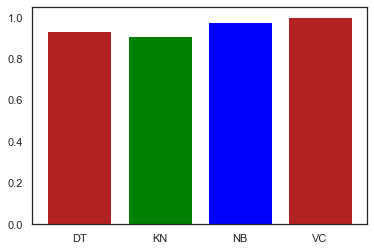

Global Accuracy:1.0


In [16]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('dt', model1), ('kn', model2),('nb', model3)], voting='soft')
model.fit(x_train,y_train)

acc=model.score(x_test,y_test)
accuracies.append(acc)
names_models.append("VC")
plot_prediction(accuracies, names_models)
print("Global Accuracy:"+str(acc))

## 2. Average Technique
In this technique the prediction is averaged. Since usually in classification problems, the prediction is a categorical value, we have to transform such a
prediction into a real value as the probability of the classes. 

In [17]:
pred1 = model1.predict_proba(x_test) 


In [18]:
#model1.predict_proba(x_test) 

In [19]:
x_test.shape

(45, 10)

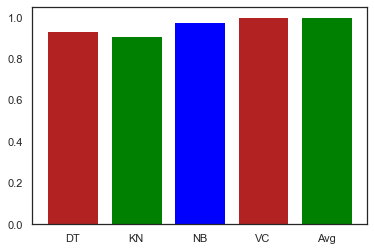

Global Accuracy:1.0


In [20]:
#The meth0d predict_proba is different to predict. 
#This returns the probability of the clases

pred2 = model2.predict_proba(x_test)
pred3 = model3.predict_proba(x_test)

finalpred=[]
for i in range(0, len(pred1)):
    averages=(pred1[i,:]+pred2[i,:]+pred3[i,:])/3
    finalpred.append(np.argmax(averages)+1)

finalpred = np.array(finalpred)

acc = metrics.accuracy_score(y_test, finalpred)
accuracies.append(acc)
names_models.append("Avg")
plot_prediction(accuracies, names_models)
print("Global Accuracy:"+str(acc))

## 3. Stacking Techniques

In [21]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
#Encapsulted in a function
def Stacking(model,train,y,test,n_fold):
    #Step 1:Define the K-folds parameter
    #folds=StratifiedKFold(n_splits=n_fold,random_state=1,shuffle= True)
    folds=StratifiedKFold(n_splits=n_fold, random_state=None, shuffle=False)
    #Step 2:Define arrays to storage test predictions and train prediction  
    test_pred=np.empty((0,1),float)
    train_pred=np.empty((0,1),float)
    #Step 3 Split the train dataset into k-folds, train with k-1 folds and validate
    #with the remain fold.  
    for train_indices,val_indices in folds.split(train,y.values):
        #Determine the training and validation datasets based on the splits
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        #Train the model using training data
        model.fit(X=x_train,y=y_train)
        #Predict using validation data
        train_pred=np.append(train_pred,model.predict(x_val))
        #Predict using validation data
    test_pred = np.append(test_pred,model.predict(test))
    
    return test_pred,train_pred
  

Using stacking approach

Level 1, model 1

In [22]:
model1 = DecisionTreeClassifier()
test_pred1 , train_pred1 = Stacking(
    model=model1, n_fold=10, train=x_train, test=x_test, y=y_train
)

train_pred1 = pd.DataFrame(train_pred1) #New train dataset
test_pred1 = pd.DataFrame(test_pred1)   #New test  dataset

print(train_pred1.shape)
print(test_pred1.shape)

(133, 1)
(45, 1)


Level 1, model 2

In [23]:
model2 = KNeighborsClassifier()
test_pred2 ,train_pred2 = Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)
train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

print(train_pred2.shape)
print(test_pred2.shape)

(133, 1)
(45, 1)


Level 2, metamodel

In [24]:
from sklearn.linear_model import LogisticRegression

df_train = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

df_train.shape, df_test.shape

((133, 2), (45, 2))

In [25]:
df_train.columns = ['y1', 'y2']
df_test.columns = ['y1', 'y2']

for col in ['y1', 'y2']:
    df_train[col] = df_train[col].astype(str)
    df_test[col] = df_test[col].astype(str)
    
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [26]:
df_train = pd.get_dummies(df_train)
df_train.head()

,y1_1.0,y1_2.0,y1_3.0,y2_1.0,y2_2.0,y2_3.0
0,1,0,0,1,0,0
1,0,1,0,0,1,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [27]:
df_test = pd.get_dummies(df_test)
df_test.head()

,y1_1.0,y1_2.0,y1_3.0,y2_1.0,y2_2.0,y2_3.0
0,0,0,1,0,0,1
1,0,1,0,0,1,0
2,1,0,0,1,0,0
3,0,1,0,0,1,0
4,1,0,0,1,0,0


In [28]:
df_train.shape, df_test.shape

((133, 6), (45, 6))

In [29]:
model3 = LogisticRegression(random_state=1)
model3.fit(df_train,y_train)

LogisticRegression(random_state=1)

In [30]:
df_train.shape, y_train.shape

((133, 6), (133,))

In [31]:
y_test.shape

(45,)

In [32]:
pd.concat(
    [df_train.reset_index() ,pd.DataFrame(y_train)], axis=1
)

final_predictions = model3.predict(df_test)

print("Global Accurracy:"+str(metrics.accuracy_score(y_test, final_predictions)))



Global Accurracy:0.9333333333333333


## Use sklearn implementation

In [33]:
estimators=[('DT',model1),('KN', model2)]
clf = StackingClassifier(estimators=estimators,cv=10, stack_method='predict',final_estimator=model3)
clf.fit(x_train,y_train).score(x_test,y_test)

0.9111111111111111

# Advanced Techniques
## Next Sesion (June 20)

BAGGING

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.9777777777777777

BOOSTING

In [35]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=29082013)
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.5555555555555556

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9111111111111111

In [37]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
model.fit(x_train, y_train);
model.score(x_test,y_test)

0.9662670066889633